<a href="https://colab.research.google.com/github/A01662420/SemanaTec6_4toSemesrte/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv(r"sample_data/avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
print(dataframe.groupby('AveragePrice').size())

AveragePrice
0.44    1
0.46    1
0.48    1
0.49    2
0.51    5
       ..
3.04    1
3.05    1
3.12    1
3.17    1
3.25    1
Length: 259, dtype: int64


<ipython-input-41-06fb3eea708a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['Total Volume'],1).hist()


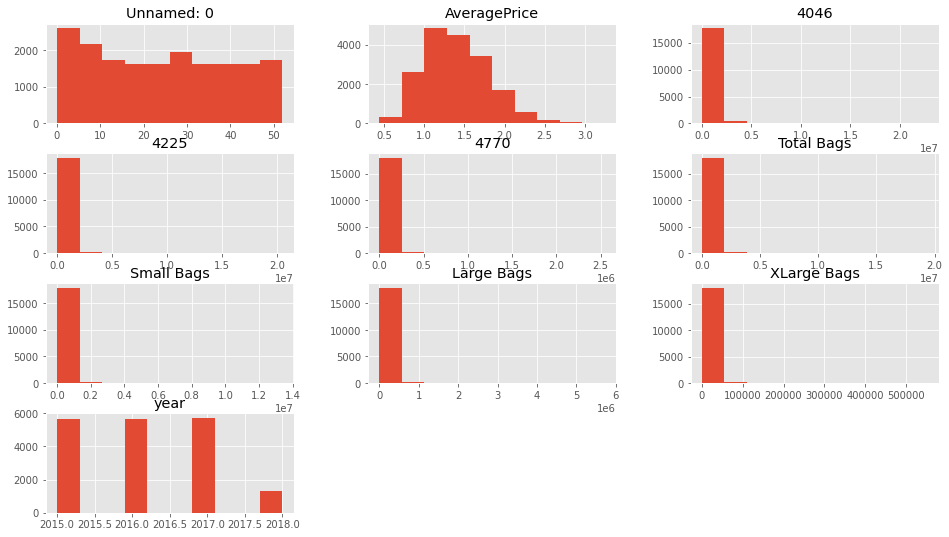

In [ ]:
dataframe.drop(['Total Volume'],1).hist()
plt.show()

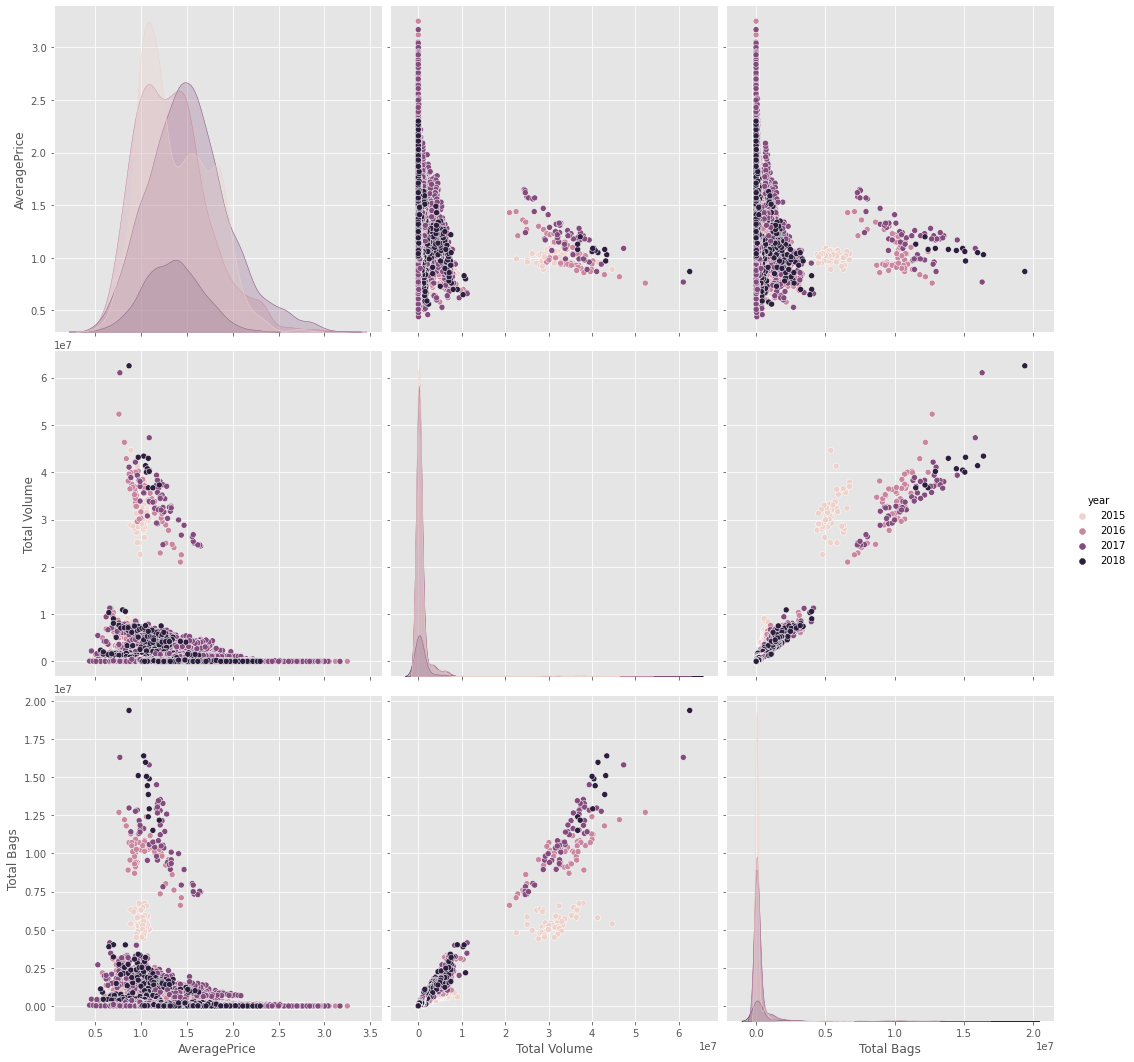

In [ ]:
sb.pairplot(dataframe.dropna(), hue='year',height=5,vars=["AveragePrice","Total Volume","Total Bags"],kind='scatter')

In [ ]:

X = np.array(dataframe[["AveragePrice","Total Volume","Total Bags"]])
y = np.array(dataframe['year'])
X.shape
y

array([2015, 2015, 2015, ..., 2018, 2018, 2018])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

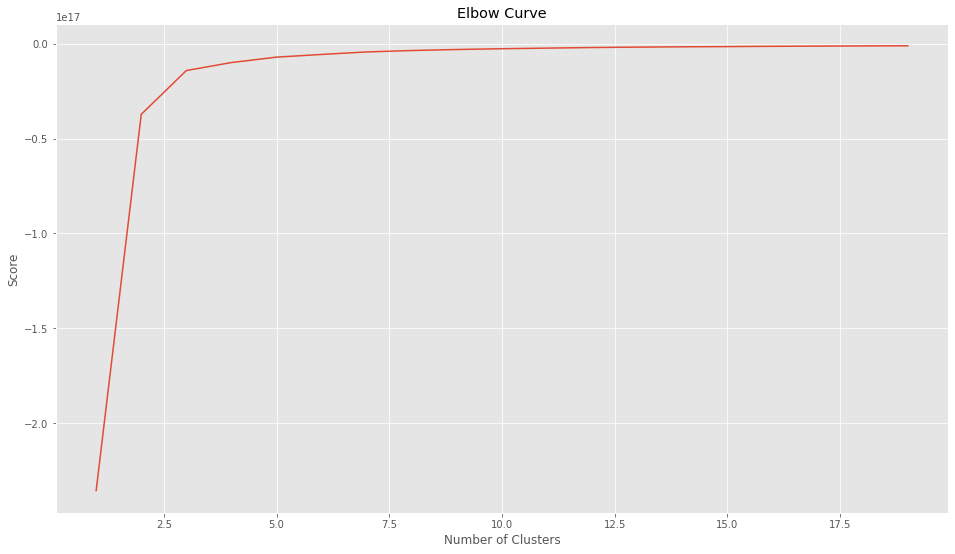

In [ ]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.40891316e+00 5.43262224e+05 1.55972485e+05]
 [1.09201183e+00 3.37350390e+07 9.19049275e+06]]


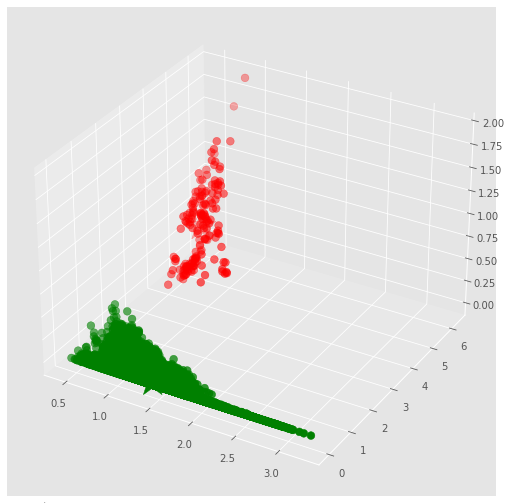

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

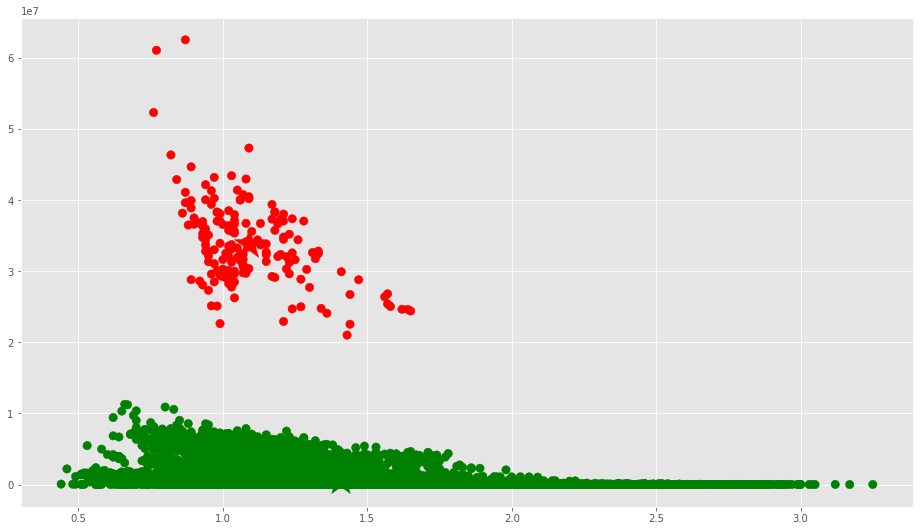

In [ ]:

# Getting the values and plotting it
f1 = dataframe['AveragePrice'].values
f2 = dataframe['Total Volume'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

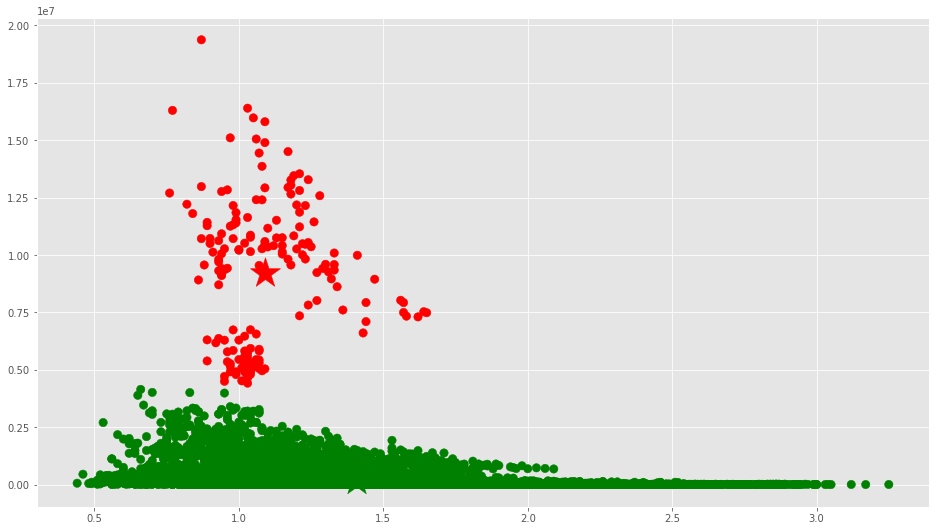

In [ ]:

# Getting the values and plotting it
f1 = dataframe['AveragePrice'].values
f2 = dataframe['Total Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

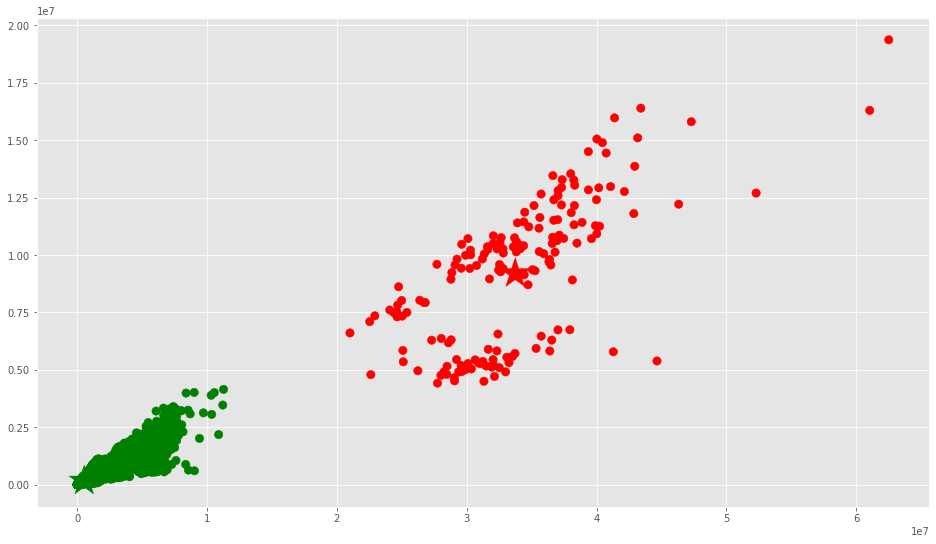

In [ ]:

f1 = dataframe['Total Volume'].values
f2 = dataframe['Total Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
#Podemos ver cada uno de los clusters cuantos typos de aguacate tiene:
copy =  pd.DataFrame()
copy['type']=dataframe['type'].values
copy['year']=dataframe['year'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,green,18080
1,red,169


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.43714795e+00 2.16873030e+05 6.55194450e+04]
 [1.13689320e+00 3.01096566e+07 7.50836503e+06]
 [9.74466546e-01 6.01170071e+06 1.60841042e+06]
 [1.02196970e+00 3.93928326e+07 1.18156315e+07]
 [1.17572895e+00 2.98543249e+06 8.68571035e+05]]


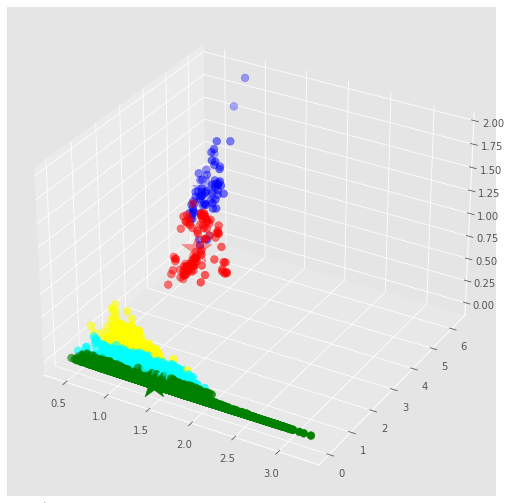

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','red','yellow','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

**Antonio Machorro A01782114**

Se visualizan los valores de la base de datos para averiguar los datos que se usarán para graficar a través de **k**.

Decidimos hacer la comparación de tres valores: **AveragePrice**, **Total Volume** y **Total Bags**, utilizando los años como el factor de comparación. Como se puede observar, conforme mayor el volumen, será menor el precio estándar. Algo similar ocurre con el número total de bolsas y el precio. La relación entre volúmen total y bolsas totales es lineal, debido a que, mientras más bolsas existan, más volúmen total habrá.

Se toma un vector de **Average Price**, **Total Volume** y **Total Bags** que se van a utilizar como los valores de x, mientras que el año se usará para el valor de y.

Se hace la **Elbow Curve** para averiguar el valor de **n_cluster** que se utilizará para graficar los clusters.

Se utilizan dos **n_clusters** para el valor de **kmeans** dado a que la gráfica anterior cambia en el valor de 2 y, además, sólamente se necesitan dos clusters para visualizar los valores necesarios. Así obtenemos el valor de **k** necesario para las siguientes gráficas.

Como se puede ver, existen dos clusters diferentes con centros marcados por la estrella. 

Debido a que los valores se aproximan mucho a los centros, se puede decir que los centros **sí son valores representativos de cada cluster**.

Debido a que la X está representada por un vector de tres dimensiones, no se puede visualizar completamente la gráfica adecuada, pues no puede ser una gráfica de cuatro dimensiones. Por esto, se usarán gráficas de dos dimensiones para comparar los valores entre ellos.

Debido a que utilizamos sólamente **dos clusters**, entonces los centros están muy separados entre sí, especialmente en la dimensión **z**. Ninguno de los centros se encuentra cerca de otro.

Si hubieran muchos **outliers** en las gráficas de cajas y bigotes, entonces habría un mayor **k** y además un mayor **n_cluster**, por lo que los centros tendrían una mayor distancia entre sí y cada centro tendría una mayor importancia representativa.

Como se puede observar al utilizar un valor más alto, los centros son menos representativos, pues los clusters diferentes son más parecidos entre sí y no cambian lo suficiente para mostrar un cambio representativo. Nos podemos apoyar de la **Elbow Curve** para afirmar esto. Debido a que arriba del valor 5 para ésta gráfica ya no hay variación, entonces podemos afirmar que no es de mucha utilidad utilizar 5 o más clusters.

Dados los centros, entonces se puede decir que hay mucha variación entre ambos clusters estudiados. Hay grupos de aguacates en ciertos años que tienden a tener mayor cantidad de **Total Bags** conforme menor sea el **AveragePrice**. Mientras que hay otro grupo de aguacates donde la tendencia varía dependiendo de **Total Bags** y el **Total Volume**. Entonces, dados los centros, podemos distinguir ambos grupos y obtener la diferencia entre ellos.

**Iñaki Vigil Arrechea A01662274**:
En las primeras tablas rojas se presentan los valores de la base. Se generan 10 tablas, para cada dati a graficar con K.
En las tablas de morado, azul y rosa se realiza una matriz comparativa entre average price, total volume y total bags, con los diferentes colores significando los valores del año al que pertenecen. Los valores de Total Volume y Total Bags son lineales entre sí dado que existe la relación de que las bags contienen el volumen vendido. Entre menor es el average price, más ventas hay.
En la gráfica de elbow curve se puede encontrar el valor de n_cluster. Se visualiza que alrededor del 2 cambia la curva, por lo que ya no hay variación. Por esto se toma este valor.
Después se muestra una gráfica con 2 clusters/datos, uno rojo y otro verde. Esta gráfica es 3D, tomando los mismos datos de Average Price, Total Volume y Total Bags, solo que ahora todos en una misma gráfica en vez de 9 en matriz previamente.
Más adelante vemos una gráfica 3D en la que se agregan clusters con colores diferentes. Al subir el número de clusters vemos que no hay un cambio en la graficación de los datos

**Erick Trinidad Limón Ace A01735902**

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
R=Sí, las estrellas marcan los centros de cada grupo lo cual en si es representativo de cada grupo de datos
¿Cómo obtuviste el valor de k a usar?
R= En la curva de codo se puede sacar el valor de K viendo en donde deja de cambiar la curva, en nuestro caso fue al rededor del número 2.
¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
R= Si utilizamos un valor más alto, los centros son menos representativos.
¿Qué distancia tienen los centros entre sí?¿Hay alguno que esté muy cercano a otros?
R= Estan muy separados entre sí y se pueden diferenciar muy bien.
¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
R= La gráfica sería menos representativa y perdería claridad. Si hay muchos outliers en el análisis de cajas y bigotes,  los centros de la distribución se desvian del valor real porque los outliers son valores extremos que se alejan mucho de la mayoría de los datos.
¿Qué puedes decir de los datos basándose en los centros?
R= Podemos ver que los datos se encuentran esparcidos y varian los centros entre cada cluster. Dependiendo del año puede que haya un mayor cantidad de Total Bags en relación con el AveragePrice o tendencia variable entre TotalBags y el Total Volume.

**Marco Ivan Pacheco Martinez**
Para obtener el valor de k primero graficamos los datos para ver que tan dispersos estan, despues quisimos seleccionar 3 dimensiones: el AveragePrice, Total Volume y Total bags, observando los cruces se ve en los diagramas los datos 
muy agrupados, por lo que seria interesante analizarlos de esa manera. Hicimos una grafica elbow curve para averiguar cual sería el mejor valor de K para graficar los clusters, la curva no salio tan suave y salio un poco mas recta por lo que
se optó por darle un valor de 2 a K, antes de esto la habiamos probado con un valor de 5, pero al hacer esto nos dimos cuenta que   los centros de los clusters que se generaron en los graficos estaban muy pegados,3 muy juntos y otros 2 muy juntos, se puede decir entonces que son 
representativos, porque los datos siguen estando agrupados de la misma manera que si utilizamos 5 clusters, o utilizamos solo 2, ademas que los valores se aproximan mucho a los centros.Por eso decidimos despues que solo alla solo 2 centros que agrupen 
todos los datos,aparte si tuviéramos muchos outliers en el análisis de cajas y bigotes los datos serian menos representativos, y usando las gráficas de dos dimensiones para comparar los valores entre los datos, vemos que estan bien agrupados.
# Nueva sección


**Luis Gerardo Magaña A01662420**

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Los centros sí pueden ser representativos porque las estrellas marcan los centros de cada cluster.

¿Cómo obtuviste el valor de k a usar?
Pudimos hallar el valor de K haciendo una gráfica de “Elbow curve”

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Podríamos decir que usar un valor más alto de k puede generar una mayor segmentación de los datos, pero también puede aumentar la complejidad del modelo y hacer que los centros sean menos representativos. Por otro lado, usar un valor más bajo de k puede simplificar el modelo y hacer que los centros sean más representativos de los datos, pero también puede ocultar patrones importantes.

¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?
Pues debido a que solo tenemos dos clusters, los centros están muy separados, y como justo son dos la verdad ninguno está cerca del otro. 

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Si hubiera muchos outliers en los datos, estos pueden influir en los centros y hacer que no sean representativos de los patrones en los datos. 

¿Qué puedes decir de los datos basándose en los centros?
Pues que os centros pueden ayudar a identificar patrones y tendencias en los datos, así como a agrupar puntos similares en clústeres. Sin embargo, es importante tener en cuenta que los centros son solo una representación del patrón en los datos y no proporcionan una comprensión completa de la variabilidad y complejidad de los datos. Además, la interpretación de los centros debe basarse en el conocimiento del dominio y en el objetivo del análisis.
